## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy import stats

## Load Dataset

In [2]:
conn = sqlite3.connect('sales.db')

In [3]:
# Load data into a dataframe
df = pd.read_sql_query("SELECT * FROM sales_data_summary", conn)
df.head()

,order_no,quantity,price_per_unit,order_line_no,sales,order_date,status,qtr_id,month_id,year_id,...,city,state,postal_code,country,territory,contact_last_name,contact_first_name,deal_size,discount_amount,discount_pct
0,10107,30,95.70,2,2871.00,2003-02-24 00:00:00,Shipped,1,2,2003,...,NYC,NY,10022,USA,UNKNOWN,Yu,Kwai,Small,-0.70,-0.74
1,10121,34,81.35,5,2765.90,2003-05-07 00:00:00,Shipped,2,5,2003,...,Reims,UNKNOWN,51100,France,EMEA,Henriot,Paul,Small,13.65,14.37
2,10134,41,94.74,2,3884.34,2003-07-01 00:00:00,Shipped,3,7,2003,...,Paris,UNKNOWN,75508,France,EMEA,Da Cunha,Daniel,Medium,0.26,0.27
3,10145,45,83.26,6,3746.70,2003-08-25 00:00:00,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,UNKNOWN,Young,Julie,Medium,11.74,12.36
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,San Francisco,CA,UNKNOWN,USA,UNKNOWN,Brown,Julie,Medium,-5.00,-5.26


## EDA & Insights to gather from the data
- Sales with respect to time
- Regional Performance
- Product Performance
- Customer Behaviour
- Deal Size
- Pricing and margin behavior


### Statistical Insights

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_no,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.00,10333.50,10425.00
quantity,2823.0,35.092809,9.741443,6.00,27.00,35.00,43.00,97.00
price_per_unit,2823.0,83.658544,20.174277,26.88,68.86,95.70,100.00,100.00
sales,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.80,4508.00,14082.80
qtr_id,2823.0,2.717676,1.203878,1.00,2.00,3.00,4.00,4.00
month_id,2823.0,7.092455,3.656633,1.00,4.00,8.00,11.00,12.00
year_id,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.00,2004.00,2005.00
msrp,2823.0,100.715551,40.187912,33.00,68.00,99.00,124.00,214.00
discount_amount,2823.0,17.057007,30.571804,-67.00,-1.70,9.00,28.85,154.64
discount_pct,2823.0,9.513787,27.008901,-203.03,-2.76,11.85,24.24,77.13


#### Time coverage

- Data spans 2003-2005, with most activity in 2004 as median year is 2004

- Average month ≈ July, suggesting more sales activity in the month of July

- Average quarter ≈ Q3, suggesting stronger late year demand

#### Sales 

- Average sales ≈ 3,554 and median ≈ 3,185

- The average is pulled up by a small number of large orders and the data follows a right-skewed distribution as mean is greater than the median


#### Quantity ordered

- Moderate variability overall as median and mean are approximately the same and occasional bulk purchases appear.

#### Price per unit

- Median ≈ 95.7 and mean ≈ 83.7.

- Mean below median indicates many lower priced items pulling the mean down. Hence, following left-skew distribution.

#### MSRP (Manufacturer's Suggested Retail Price)

- Median ≈ 99 and mean ≈ 100, range 33–214.

- Mix & pricing: The gap between price per unit and MSRP plus the lower-priced mix suggests room to optimize discounting and upsell to premium SKUs where appropriate.


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns 

In [6]:
numerical_cols

Index(['order_no', 'quantity', 'price_per_unit', 'sales', 'qtr_id', 'month_id',
       'year_id', 'msrp', 'discount_amount', 'discount_pct'],
      dtype='object')

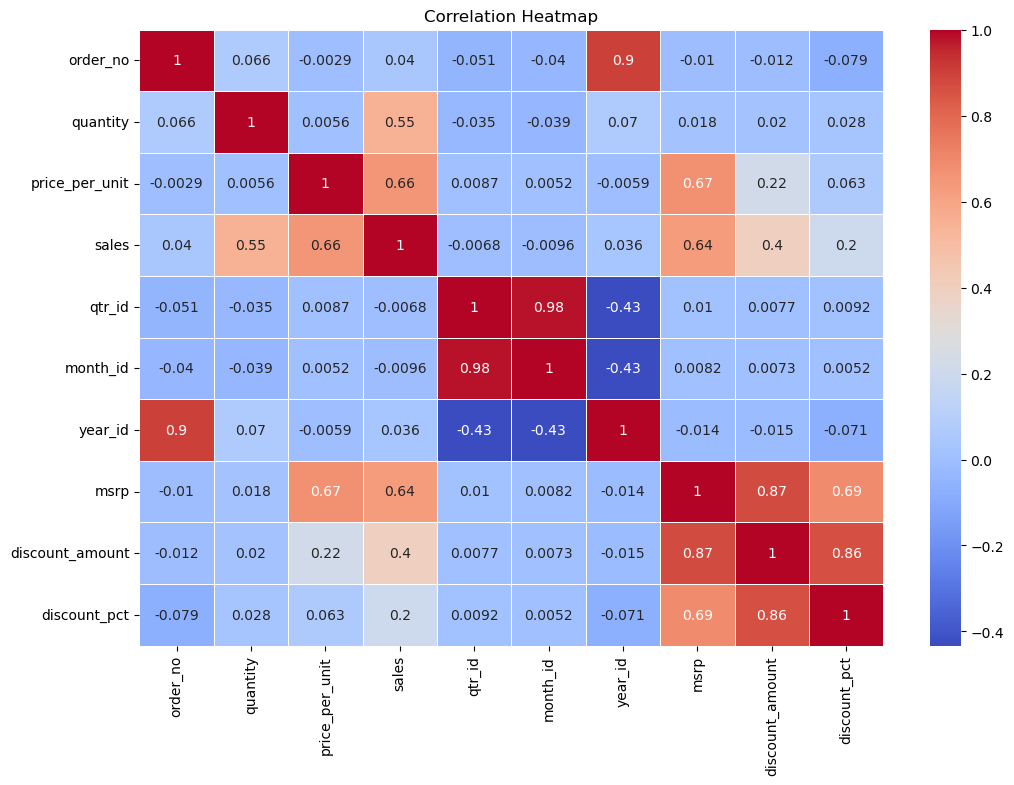

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Sales and Price per Unit** 

- Strong positive correlation.

- Interpretation: Higher priced items generate higher line item sales


**Sales and Quantity** 

- Moderate positive correlation.

- Selling more units tends to increase total sales, but not perfectly. Hence, suggesting some price and discount variation.


**MSRP andd Price Per Unit** 

- Strong positive correlation relationship. 

- Actual selling prices track closely with MSRP price.


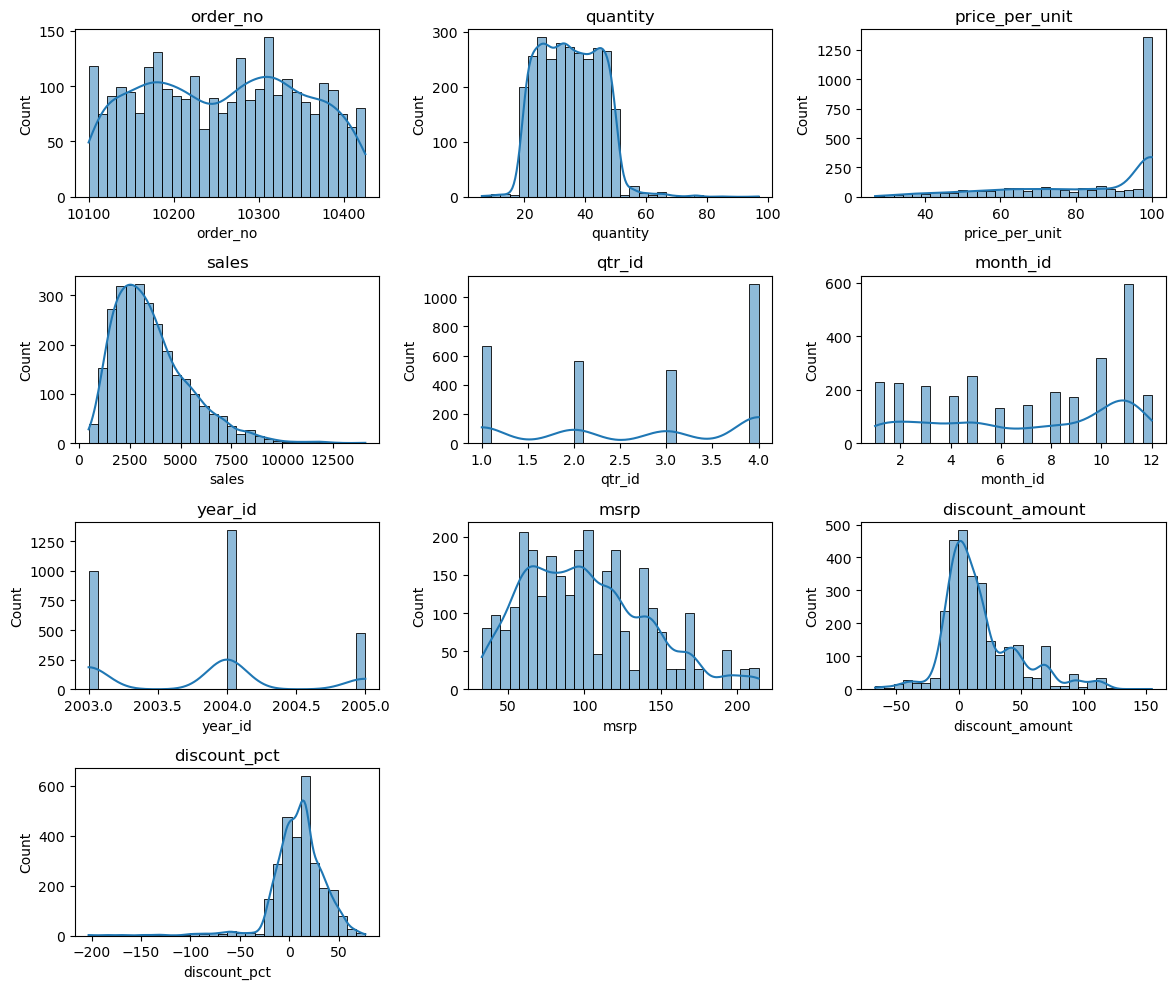

In [8]:
# Plot histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

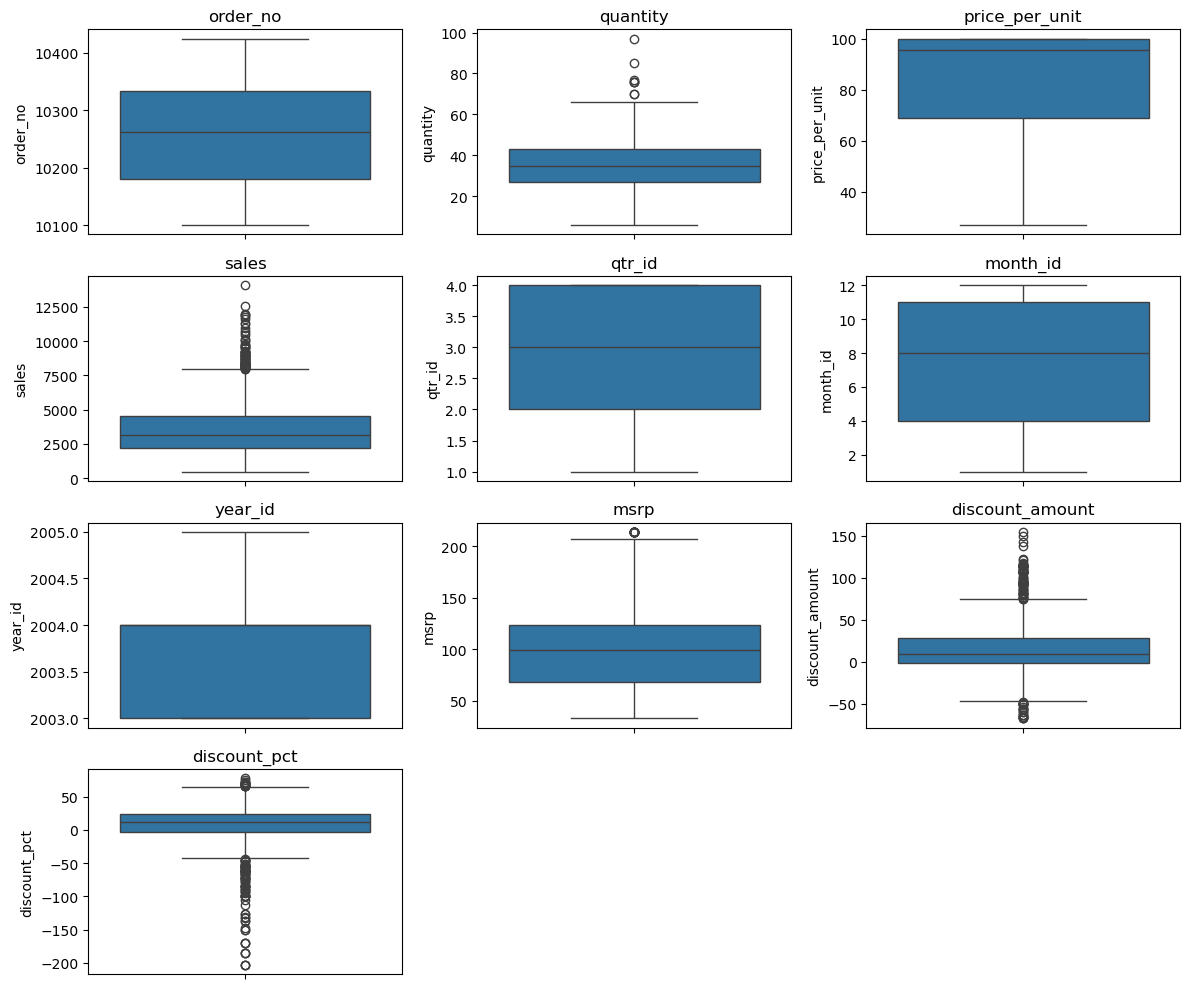

In [9]:
# Boxplot to also check outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Sales**

- Histogram is right skewed: most order lines have small to moderate sales and a few are very large.

- Boxplot confirms many outliers, but these likely represent large or bulk orders, not data errors.

**Quantity**

- A few outliers beyond 70–100 units, likely representing bulk purchases.

**Price per unit & MSRP**

- Price per unit: sharp peak near 100.

- MSRP: bell shaped, with minor outliers near 200.


Basic Insights to gather
- Data contains which years and months
- How much more revenue was made compared to last year
- Revenue with respect to time
- Which months or quarters drive the most revenue?
- Are there strong seasonal patterns
- Which countries or regions contribute most to revenue?
- Country where average sale per customer is high
- Which product lines generate the most revenue?
- Luxury items being sold at what rate and their contribution to profit?


In [10]:
pd.read_sql_query('SELECT MIN(order_date), MAX(order_date) FROM sales_data_summary', conn)

,MIN(order_date),MAX(order_date)
0,2003-01-06 00:00:00,2005-05-31 00:00:00


The data spans from the 6th of January 2003 to the 31st of May 2005

In [11]:
pd.read_sql_query("""SELECT year_id, month_id, SUM(sales) as total_sales FROM sales_data_summary
                   GROUP BY year_id, month_id
                    ORDER BY year_id, month_id""", conn)

,year_id,month_id,total_sales
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


In [13]:
# Convert it into a dataframe
sales_over_time = df.groupby(['year_id', 'month_id'])['sales'].sum().reset_index()
sales_over_time.head()

,year_id,month_id,sales
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11


In [14]:
# Remove the time
df['order_date'] = pd.to_datetime(df['order_date'])
sales_over_time['date'] = df['order_date']
sales_over_time = sales_over_time.sort_values('date')

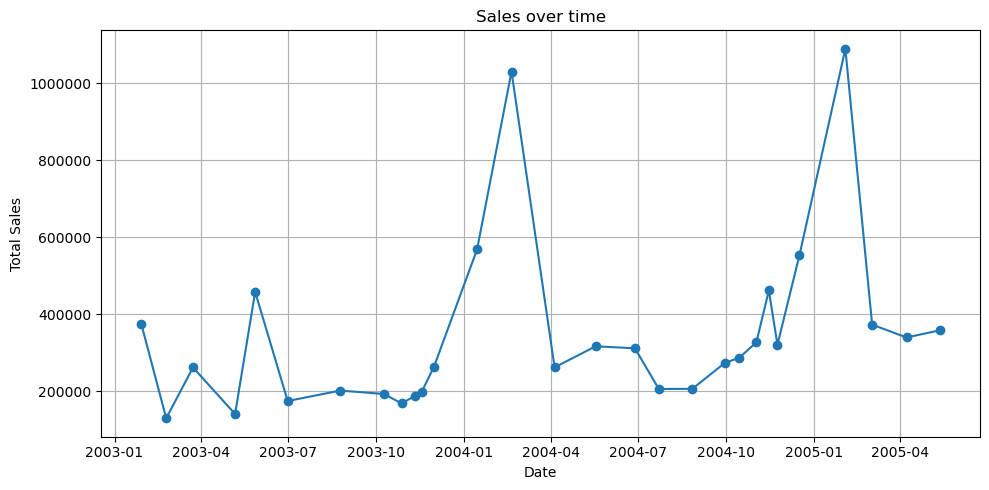

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(sales_over_time['date'], sales_over_time['sales'], marker='o')

plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()


- Which months and quarters drive the most revenue?
- Are there strong seasonal patterns?
- Are sales growing year-over-year?

In [16]:
pd.read_sql_query("""SELECT month_id, qtr_id, SUM(Sales) as total_sales FROM sales_data_summary
                  GROUP BY month_id ORDER BY total_sales DESC""",conn)

,month_id,qtr_id,total_sales
0,11,4,2118885.67
1,10,4,1121215.22
2,5,2,923972.56
3,2,1,810441.90
4,1,1,785874.44
5,3,1,754501.39
6,4,2,669390.96
7,8,3,659310.57
8,12,4,634679.12
9,9,3,584724.27


In [17]:
pd.read_sql_query("""SELECT qtr_id, SUM(Sales) as total_sales FROM sales_data_summary
                  GROUP BY qtr_id ORDER BY total_sales DESC""",conn)

,qtr_id,total_sales
0,4,3874780.01
1,1,2350817.73
2,2,2048120.30
3,3,1758910.81


#### Findings 
- Sales do indicate seasonality, where more of the concentration lies in Q4 and Q1. They together account for more than half of annual revenue.
- Over 2 million in sales were made in the month of November, indicating a clear holiday or fiscal year effect.
- Q2 and Q3 consistently underperform, suggesting untapped potential for targeted promotions or new campaigns.

How much revenue was made compared to the preceeding years?

In [18]:
# Incomplete
pd.read_sql_query("""SELECT year_id, SUM(sales) as total_sales,
                    LAG(SUM(sales)) OVER (ORDER BY year_id) as prev_year_revenue,
                    ROUND((SUM(sales)-LAG(SUM(sales)) OVER (ORDER BY year_id)) / 
                    NULLIF(LAG(SUM(sales)) OVER (ORDER BY year_id), 0) * 100, 3) growth_pct
                    FROM sales_data_summary
                    GROUP BY year_id
                    ORDER BY year_id;""",conn)

,year_id,total_sales,prev_year_revenue,growth_pct
0,2003,3516979.54,NaN,NaN
1,2004,4724162.60,3516979.54,34.324
2,2005,1791486.71,4724162.60,-62.078


Note: the year 2005 does not cover sales revenue data for the entire year but rather only for a few months. Hence, the huge negative growth percentage

- Which countries or regions contribute most to revenue?
- Do smaller markets have higher per-customer spend?

In [19]:
pd.read_sql_query("""SELECT country, SUM(sales) as revenue, COUNT(customer_name) as customers, AVG(sales) as avg_revenue
                    FROM sales_data_summary
                    GROUP BY country
                    ORDER BY revenue DESC""", conn)

,country,revenue,customers,avg_revenue
0,USA,3627982.83,1004,3613.528715
1,Spain,1215686.92,342,3554.640117
2,France,1110916.52,314,3537.950701
3,Australia,630623.10,185,3408.773514
4,UK,478880.46,144,3325.558750
5,Italy,374674.31,113,3315.701858
6,Finland,329581.91,92,3582.412065
7,Norway,307463.70,85,3617.220000
8,Singapore,288488.41,79,3651.752025
9,Denmark,245637.15,63,3899.002381


#### Findings
- Revenue is concentrated in a few large markets such as the USA, Spain, and France, which together make up about two thirds of total sales.
- Smaller markets such as Denmark, Switzerland, and Austria contribute less in total but show higher per customer spending, suggesting premium positioning or strong brand loyalty.

- Which product lines generate the most revenue?

In [20]:
pd.read_sql_query("""SELECT product_line, SUM(sales) revenue, AVG(price_per_unit) avg_price, SUM(quantity) units_sold
                    FROM sales_data_summary
                    GROUP BY product_line
                    ORDER BY revenue DESC""", conn)

,product_line,revenue,avg_price,units_sold
0,Classic Cars,3919615.66,87.335781,33992
1,Vintage Cars,1903150.84,78.148204,21069
2,Motorcycles,1166388.34,82.997553,11663
3,Trucks and Buses,1127789.84,87.527940,10777
4,Planes,975003.57,81.740915,10727
5,Ships,714437.13,83.855470,8127
6,Trains,226243.47,75.654675,2712


#### Findings

- Revenue concentration: Classic Cars dominate , and then the next line Vintage Cars. 
- Volume drives revenue: Average prices are tightly bunched, so the revenue gaps are mainly from units sold.

- Who are the top 10 customers by revenue?

- How often do they order?

In [21]:
pd.read_sql_query("""SELECT customer_name, SUM(sales) revenue, SUM(quantity) units_sold, COUNT(order_no) order_count
                    FROM sales_data_summary
                    GROUP BY customer_name
                    ORDER BY revenue DESC
                    LIMIT 10""", conn)

,customer_name,revenue,units_sold,order_count
0,Euro Shopping Channel,912294.11,9327,259
1,Mini Gifts Distributors Ltd.,654858.06,6366,180
2,"Australian Collectors, Co.",200995.41,1926,55
3,Muscle Machine Inc,197736.94,1775,48
4,La Rochelle Gifts,180124.90,1832,53
5,"Dragon Souveniers, Ltd.",172989.68,1524,43
6,Land of Toys Inc.,164069.44,1631,49
7,The Sharp Gifts Warehouse,160010.27,1656,40
8,"AV Stores, Co.",157807.81,1778,51
9,"Anna's Decorations, Ltd",153996.13,1469,46


In [22]:
top_customers = pd.read_sql_query("""SELECT customer_name, SUM(sales) revenue, SUM(quantity) units_sold, COUNT(order_no) order_count
                    FROM sales_data_summary
                    GROUP BY customer_name
                    ORDER BY revenue DESC
                    LIMIT 10""", conn)

In [23]:
top_customers['revenue_contribution'] = (top_customers['revenue'] / df['sales'].sum() * 100).round(2)
top_customers['cumulative_contribution'] = top_customers['revenue_contribution'].cumsum().round(2)
top_customers

,customer_name,revenue,units_sold,order_count,revenue_contribution,cumulative_contribution
0,Euro Shopping Channel,912294.11,9327,259,9.09,9.09
1,Mini Gifts Distributors Ltd.,654858.06,6366,180,6.53,15.62
2,"Australian Collectors, Co.",200995.41,1926,55,2.00,17.62
3,Muscle Machine Inc,197736.94,1775,48,1.97,19.59
4,La Rochelle Gifts,180124.90,1832,53,1.80,21.39
5,"Dragon Souveniers, Ltd.",172989.68,1524,43,1.72,23.11
6,Land of Toys Inc.,164069.44,1631,49,1.64,24.75
7,The Sharp Gifts Warehouse,160010.27,1656,40,1.59,26.34
8,"AV Stores, Co.",157807.81,1778,51,1.57,27.91
9,"Anna's Decorations, Ltd",153996.13,1469,46,1.53,29.44


C:\Users\Shaikh\AppData\Local\Temp\ipykernel_1844\1040742264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers['customer_name'], y=top_customers['revenue_contribution'], palette='mako', ax=ax1)
C:\Users\Shaikh\AppData\Local\Temp\ipykernel_1844\1040742264.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_customers['customer_name'], rotation=90)


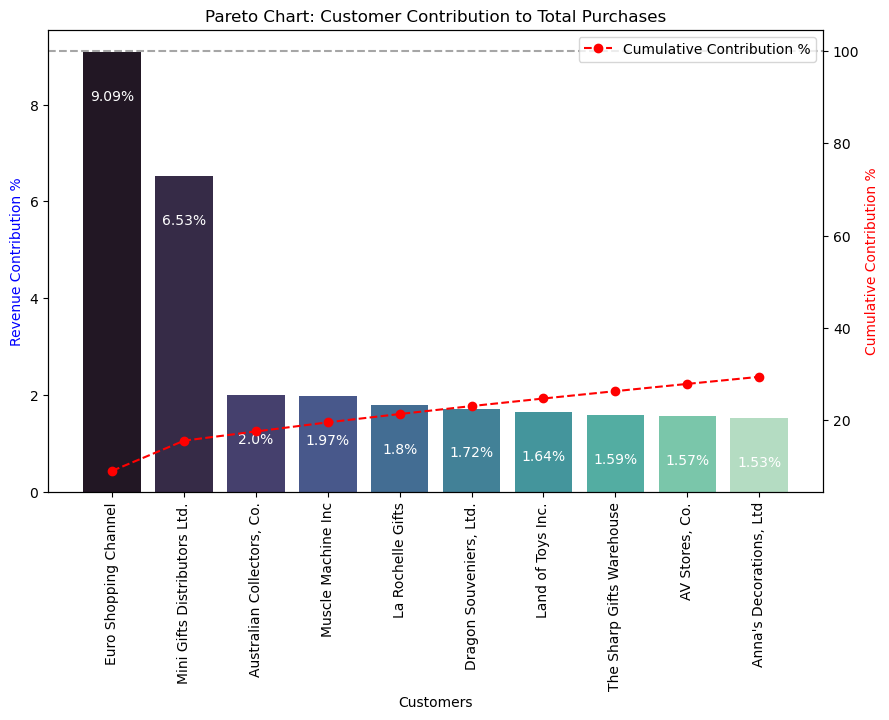

In [24]:
# Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for revenue contribution
sns.barplot(x=top_customers['customer_name'], y=top_customers['revenue_contribution'], palette='mako', ax=ax1)

for i, value in enumerate(top_customers['revenue_contribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(top_customers['customer_name'], top_customers['cumulative_contribution'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_customers['customer_name'], rotation=90)
ax1.set_ylabel('Revenue Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Customers')
ax1.set_title('Pareto Chart: Customer Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()



### Findings

- The top two customers are Euro Shipping Channel and Mini Gifts Distributions that contribute to approximately 15 percent of the total revenue
- Order frequency: Top two buyers also place very high order counts (259 and 180).
- Operational risk: The business is meaningfully exposed to a few very large accounts. Hence, retention and service quality for them are critical.

- How does revenue differ across deal sizes (small, medium, large)?

In [25]:
pd.read_sql_query(""" SELECT deal_size, SUM(sales) revenue, AVG(sales) avg_sales
                  FROM sales_data_summary    
                  GROUP BY deal_size
                  ORDER BY revenue DESC;   
""", conn)

,deal_size,revenue,avg_sales
0,Medium,6087432.24,4398.433699
1,Small,2643077.35,2061.682800
2,Large,1302119.26,8293.753248


#### Findings
- Medium deals drive the most total revenue 
- Large deals have the highest average sales per line , but lower total revenue than Medium and they’re less frequent but big when they happen.

- MSRP vs. actual selling price

In [26]:
pd.read_sql_query(""" SELECT product_line, AVG(discount_amount) avg_discount
                      FROM sales_data_summary
                      GROUP BY product_line
                       ORDER BY avg_discount DESC; 
                """, conn)

,product_line,avg_discount
0,Classic Cars,32.549431
1,Trucks and Buses,14.937176
2,Motorcycles,14.071934
3,Vintage Cars,8.313081
4,Planes,7.027059
5,Ships,2.272735
6,Trains,-2.667662


#### Findings
- Classic Cars rely heavily on discounting to drive volume, while Trains and Ships sell near or above MSRP. 
- The business could explore optimizing discount policies by testing smaller markdowns in high volume categories and preserving premium positioning in low discount lines.

### Mean Sales per region with 95% Confidence Intervals

In [27]:
df.columns

Index(['order_no', 'quantity', 'price_per_unit', 'order_line_no', 'sales',
       'order_date', 'status', 'qtr_id', 'month_id', 'year_id', 'product_line',
       'msrp', 'product_code', 'customer_name', 'address', 'city', 'state',
       'postal_code', 'country', 'territory', 'contact_last_name',
       'contact_first_name', 'deal_size', 'discount_amount', 'discount_pct'],
      dtype='object')

In [28]:
temp = df.loc[df["territory"].notna() & df["sales"].notna(), ["territory", 'sales']].copy()

In [29]:
data_val = temp.groupby('territory')['sales'].agg(n='count', mean='mean', std='std').reset_index().sort_values('mean',ascending=False)

In [30]:
# Confidence interval
def confidence_interval(mean, std, n, confidence=0.95):
    std_err = std / np.sqrt(n) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n - 1)
    margin_of_error = t_critical * std_err
    lower = mean - margin_of_error
    upper = mean + margin_of_error
    return lower, upper, margin_of_error

In [31]:
ci_low = []
ci_upper = []
ci_moe = []

for index, row in data_val.iterrows():
    lower, upper, margin = confidence_interval(row['mean'], row['std'], row['n'])
    ci_low.append(lower)
    ci_upper.append(upper)
    ci_moe.append(margin)

data_val["ci_low"] = ci_low
data_val["ci_high"] = ci_upper
data_val["margin_of_error"] = ci_moe


In [32]:
data_val

,territory,n,mean,std,ci_low,ci_high,margin_of_error
2,Japan,121,3761.762149,1992.332177,3403.154962,4120.369336,358.607187
3,UNKNOWN,1074,3586.649339,1857.765115,3475.418064,3697.880613,111.231274
1,EMEA,1407,3538.928507,1830.549684,3443.196628,3634.660387,95.731879
0,APAC,221,3376.116878,1743.712378,3144.951654,3607.282101,231.165224


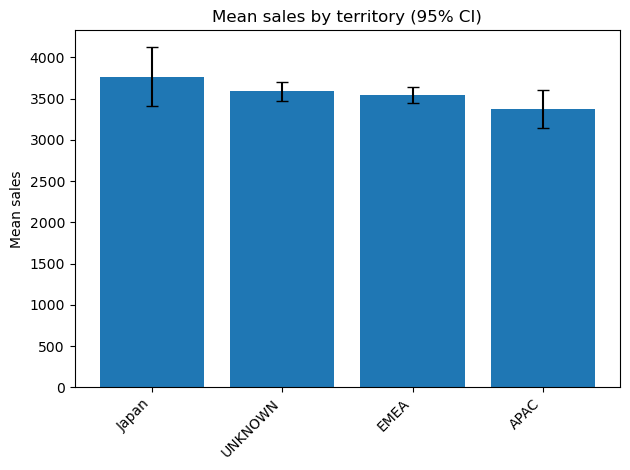

In [33]:
x = range(len(data_val))
means = data_val["mean"]
yerr = [means - data_val["ci_low"], data_val["ci_high"] - means]

plt.bar(x, means, yerr=yerr, capsize=4)
plt.xticks(x, data_val["territory"], rotation=45, ha="right")
plt.ylabel("Mean sales")
plt.title("Mean sales by territory (95% CI)")
plt.tight_layout()
plt.show()


Is there a significant difference between the mean sales across different territories (EMEA, APAC, Japan)?

**Note**: Unknown is to be ignored

Hypothesis:
- H0: Mean sales are equal across known territories (EMEA, APAC, Japan).
- H1: At least one territory’s mean differs.

In [34]:
t1, t2, t3 = 'Japan', 'APAC', 'EMEA'

In [35]:
x1 = df.loc[df["territory"] == t1, 'sales'].to_numpy()
x2 = df.loc[df['territory'] == t2, 'sales'].to_numpy()
x3 = df.loc[df['territory'] == t3, 'sales'].to_numpy()

#### One Way ANOVA testing

In [36]:
f_stat, p_val = stats.f_oneway(x1, x2, x3)

In [37]:
print(f"ANOVA F={f_stat:.2f}, p={p_val:.3f}")

ANOVA F=1.76, p=0.172


#### Findings
- As p ≥ 0.05, we have failed to reject the null hypothesis and can conclude that the average sales do not significantly differ across Japan, APAC and EMEA.
- Conclusion: Focus growth efforts on product assortment and deal strategy rather than territory.

In [ ]:
# t_stat, p_val = stats.ttest_ind(x1, x3, equal_var=False, nan_policy='omit')

In [ ]:
# print(f"{t1} mean={x1.mean()} (n={x1.size})")
# print(f"{t3} mean={x3.mean()} (n={x3.size})")
#print(f"Welch t-test: t={t_stat.round(2)}, p={p_val.round(2)}")